In [1]:

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
trainData = pd.read_csv("train_titanic.csv")
testData = pd.read_csv("test_titanic.csv")
Submission=pd.DataFrame()
Submission['PassengerId'] = testData['PassengerId']



In [2]:
print(trainData.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [3]:

trainData['Age'].fillna(round(trainData['Age'].mean()), inplace=True)
print(trainData[5:6])



   PassengerId  Survived  Pclass              Name   Sex   Age  SibSp  Parch  \
5            6         0       3  Moran, Mr. James  male  30.0      0      0   

   Ticket    Fare Cabin Embarked  
5  330877  8.4583   NaN        Q  


In [4]:
trainData['Sex'] = pd.Categorical(trainData.Sex).codes



In [5]:
trainData.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25    

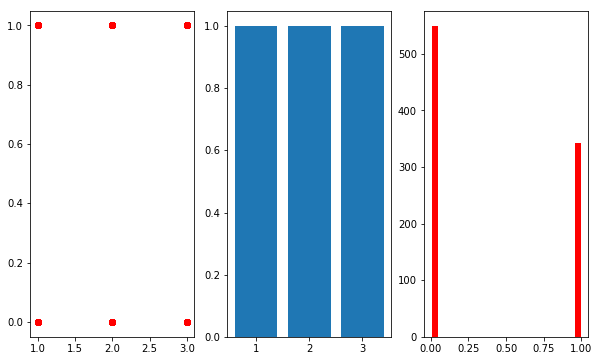

In [6]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10, 6))

plt.subplot(131)
plt.plot([trainData.Pclass],[trainData.Survived],'ro')

plt.subplot(132)
plt.bar(trainData.Pclass,trainData.Survived)

plt.subplot(133)
range = [0,1]
bins = 20 

plt.hist(trainData.Survived, bins, range, color = 'red',histtype = 'bar',rwidth=.8)



plt.show()


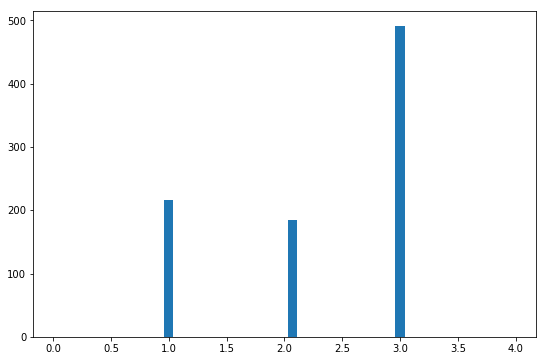

In [7]:
plt.figure(1, figsize=(9, 6))

plt.hist(trainData.Pclass,bins=30,range=(0,4),rwidth=.6)
plt.show()

In [8]:
print(pd.isnull(trainData).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:


X=trainData[['Pclass','Age','SibSp','Parch','Fare']].fillna(-1000)
y=trainData['Survived']
#X_test  = testData.drop("PassengerId",axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

from sklearn.svm import LinearSVC

clf = SVC()
clf.fit(X_train, y_train)
linear_svc = LinearSVC()
print("Accuracy: {}".format(clf.score(X_test, y_test)))


Accuracy: 0.6927374301675978


In [10]:
print(pd.isnull(testData).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
testData['Age'].fillna(round(trainData['Age'].mean()), inplace=True)
print(pd.isnull(testData).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [12]:
test = testData[['Pclass','Age','SibSp','Parch','Fare']].fillna(-1000)
Submission['Survived']=clf.predict(test)
print(Submission.head())
print('predictions generated')


   PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         0
4          896         0
predictions generated


In [15]:
Submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [16]:
print(Submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         0
4            896         0
5            897         0
6            898         0
7            899         1
8            900         0
9            901         1
10           902         0
11           903         0
12           904         0
13           905         0
14           906         0
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         1
21           913         0
22           914         1
23           915         0
24           916         0
25           917         0
26           918         1
27           919         0
28           920         1
29           921         1
..           ...       ...
388         1280         0
389         1281         0
390         1282         1
391         1283         1
392         1284         0
3

In [18]:
Submission.to_csv('Sub.csv')